### The Happiness Project
* 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

import gmaps
import requests
import json


from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

In [17]:
# Import World Happiness Report Data 2021
raw_happiness_df = pd.read_csv("Data/world-happiness-report-2021.csv")

# Using DataFrame.insert() to add a column
raw_happiness_df.insert(2, "Year", "2021")

# Rename columns
raw_happiness_df = raw_happiness_df.rename(columns={'Country name': 'Country', 
                                                'Regional indicator': 'Region',
                                                'Ladder score': 'Happiness Score',
                                                'Social support': 'Social Support',                                                    
                                                'Logged GDP per capita': 'GDP per Capita',
                                                'Healthy life expectancy': 'Life Expectancy',
                                                'Freedom to make life choices': 'Freedom',
                                                'Perceptions of corruption': 'Corruption'})

# Drop columns not needed
happiness_df = raw_happiness_df.drop(columns=['Standard error of ladder score', 
                                              'upperwhisker', 
                                              'lowerwhisker',
                                              'Ladder score in Dystopia',
                                              'Explained by: Log GDP per capita',
                                              'Explained by: Social support',
                                              'Explained by: Healthy life expectancy',
                                              'Explained by: Freedom to make life choices',
                                              'Explained by: Generosity',
                                              'Explained by: Perceptions of corruption',
                                              'Dystopia + residual'])
# Show preview of DataFrame
happiness_df

,Country,Region,Year,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,Finland,Western Europe,2021,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,2021,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,2021,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,2021,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,2021,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [18]:
# Select data for happiness map from happiness_df
happiness_map_data = happiness_df[['Country', 'Happiness Score']]

# Set happiness map parameters
fig = px.choropleth(happiness_map_data, 
                     locations="Country", 
                     locationmode = "country names",
                     color = "Happiness Score",
                     hover_name = "Country",
                     color_continuous_scale = px.colors.sequential.Plasma)

# Show map
fig.show()

***Happiness Data in time Import data files, stats and visualisation

In [19]:
# Import World Happiness Report Data 2005-2020
raw_happiness_time = pd.read_csv("Data/world-happiness-report.csv")

# Using DataFrame.insert() to add a column
raw_happiness_time.insert(2, "Region", "")

# Rename columns
raw_happiness_time = raw_happiness_time.rename(columns={'Country name': 'Country',
                                                'year' : 'Year',
                                                'Life Ladder': 'Happiness Score',
                                                'Social support': 'Social Support',  
                                                'Healthy life expectancy at birth': 'Life Expectancy',
                                                'Log GDP per capita': 'GDP per Capita',
                                                'Healthy life expectancy': 'Life Expectancy',
                                                'Freedom to make life choices': 'Freedom',
                                                'Perceptions of corruption': 'Corruption'})

# Drop columns not needed
happiness_time = raw_happiness_time.drop(columns=['Positive affect', 
                                                   'Negative affect' 
                                                  ])
happiness_time

,Country,Year,Region,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,Afghanistan,2008,,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,2009,,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,2010,,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,2011,,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,2012,,3.783,7.705,0.521,52.24,0.531,0.236,0.776
...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,,3.735,7.984,0.768,54.40,0.733,-0.095,0.724
1945,Zimbabwe,2017,,3.638,8.016,0.754,55.00,0.753,-0.098,0.751
1946,Zimbabwe,2018,,3.616,8.049,0.775,55.60,0.763,-0.068,0.844
1947,Zimbabwe,2019,,2.694,7.950,0.759,56.20,0.632,-0.064,0.831


In [20]:
# Convert Year column from string to int
happiness_time['Year'] = happiness_time['Year'].astype(int)

# Add data from 2021 to our 2005-2020 DataFrame 
happiness_time_final = pd.concat([happiness_time, happiness_df])

#  Sort DataFrame by Country and Year for more clarity
happiness_time_final = happiness_time_final.sort_values(['Country', 'Year'])

# Show dataframe preview
happiness_time_final

,Country,Year,Region,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,Afghanistan,2008,,3.724,7.370,0.451,50.800,0.718,0.168,0.882
1,Afghanistan,2009,,4.402,7.540,0.552,51.200,0.679,0.190,0.850
2,Afghanistan,2010,,4.758,7.647,0.539,51.600,0.600,0.121,0.707
3,Afghanistan,2011,,3.832,7.620,0.521,51.920,0.496,0.162,0.731
4,Afghanistan,2012,,3.783,7.705,0.521,52.240,0.531,0.236,0.776
...,...,...,...,...,...,...,...,...,...,...
1945,Zimbabwe,2017,,3.638,8.016,0.754,55.000,0.753,-0.098,0.751
1946,Zimbabwe,2018,,3.616,8.049,0.775,55.600,0.763,-0.068,0.844
1947,Zimbabwe,2019,,2.694,7.950,0.759,56.200,0.632,-0.064,0.831
1948,Zimbabwe,2020,,3.160,7.829,0.717,56.800,0.643,-0.009,0.789


In [21]:
# Global average scores per year
avg_scores = happiness_time_final.groupby(["Country"]).mean()
avg_scores

,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
Country,,,,,,,
Afghanistan,3.512231,7.654231,0.504923,52.284077,0.507692,0.056846,0.849538
Albania,5.026357,9.394071,0.714857,67.649929,0.671643,-0.078929,0.871643
Algeria,5.334000,9.330333,0.803375,65.369444,0.513571,-0.133286,0.699714
Angola,4.420250,8.990000,0.738250,53.550000,0.456250,-0.088250,0.866750
Argentina,6.286313,10.029312,0.904000,67.968750,0.771938,-0.161250,0.841562
...,...,...,...,...,...,...,...
Venezuela,5.949375,9.448769,0.907062,66.005000,0.663188,-0.164583,0.797187
Vietnam,5.312867,8.676467,0.830714,67.002267,0.887250,-0.004571,0.785727
Yemen,3.892692,8.055000,0.746923,55.040154,0.620846,-0.128091,0.822200


In [22]:
australia_happiness = happiness_time_final[happiness_time_final['Country'] == 'Australia']
australia_happiness

,Country,Year,Region,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
66,Australia,2005,,7.341,10.659,0.968,71.40,0.935,NaN,0.390
67,Australia,2007,,7.285,10.703,0.965,71.72,0.891,0.347,0.513
68,Australia,2008,,7.254,10.719,0.947,71.88,0.916,0.305,0.431
69,Australia,2010,,7.450,10.722,0.955,72.20,0.932,0.317,0.366
70,Australia,2011,,7.406,10.733,0.967,72.30,0.945,0.369,0.382
71,Australia,2012,,7.196,10.754,0.945,72.40,0.935,0.274,0.368
72,Australia,2013,,7.364,10.762,0.928,72.50,0.933,0.269,0.432
73,Australia,2014,,7.289,10.772,0.924,72.60,0.923,0.319,0.442
74,Australia,2015,,7.309,10.779,0.952,72.70,0.922,0.332,0.357
75,Australia,2016,,7.250,10.791,0.942,73.00,0.922,0.239,0.399


In [36]:
finland_happiness = happiness_time_final[happiness_time_final['Country'] == 'Finland']
finland_happiness

,Country,Year,Region,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
551,Finland,2006,,7.672,10.745,0.965,69.76,0.969,-0.005,0.132
552,Finland,2008,,7.671,10.796,0.951,70.08,0.934,0.028,0.217
553,Finland,2010,,7.393,10.734,0.935,70.40,0.916,0.091,0.413
554,Finland,2011,,7.354,10.754,0.938,70.64,0.936,0.101,0.320
555,Finland,2012,,7.420,10.735,0.928,70.88,0.921,-0.001,0.361
556,Finland,2013,,7.445,10.722,0.941,71.12,0.919,0.040,0.306
557,Finland,2014,,7.385,10.714,0.952,71.36,0.933,-0.001,0.265
558,Finland,2015,,7.448,10.716,0.948,71.60,0.930,0.111,0.223
559,Finland,2016,,7.660,10.740,0.954,71.70,0.948,-0.027,0.250
560,Finland,2017,,7.788,10.768,0.964,71.80,0.962,-0.002,0.192


In [43]:
afghanistan_happiness = happiness_time_final[happiness_time_final['Country'] == 'Afghanistan']
afghanistan_happiness

,Country,Year,Region,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,Afghanistan,2008,,3.724,7.370,0.451,50.800,0.718,0.168,0.882
1,Afghanistan,2009,,4.402,7.540,0.552,51.200,0.679,0.190,0.850
2,Afghanistan,2010,,4.758,7.647,0.539,51.600,0.600,0.121,0.707
3,Afghanistan,2011,,3.832,7.620,0.521,51.920,0.496,0.162,0.731
4,Afghanistan,2012,,3.783,7.705,0.521,52.240,0.531,0.236,0.776
5,Afghanistan,2013,,3.572,7.725,0.484,52.560,0.578,0.061,0.823
6,Afghanistan,2014,,3.131,7.718,0.526,52.880,0.509,0.104,0.871
7,Afghanistan,2015,,3.983,7.702,0.529,53.200,0.389,0.080,0.881
8,Afghanistan,2016,,4.220,7.697,0.559,53.000,0.523,0.042,0.793
9,Afghanistan,2017,,2.662,7.697,0.491,52.800,0.427,-0.121,0.954


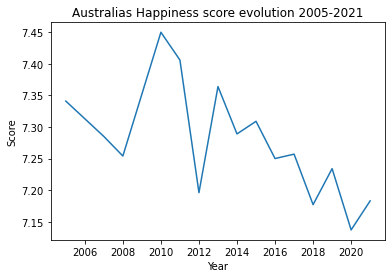

In [57]:
# Plot line for Australia's Happiness Scores 2005-2021
x_axis = australia_happiness['Year']
y_axis = australia_happiness['Happiness Score']

plt.plot(x_axis, y_axis)

plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Australias Happiness score evolution 2005-2021')
plt.show()

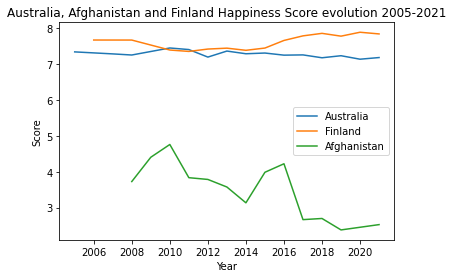

In [58]:
# Plot line for Australia, Afghanistan and Finland Happiness Scores 2005-2021
x_axis = australia_happiness['Year']
y_axis = australia_happiness['Happiness Score']
x_axis2 = finland_happiness['Year']
y_axis2 = finland_happiness['Happiness Score']
x_axis3 = afghanistan_happiness['Year']
y_axis3 = afghanistan_happiness['Happiness Score']

plt.plot(x_axis, y_axis)
plt.plot(x_axis2, y_axis2)
plt.plot(x_axis3, y_axis3)

plt.legend(('Australia','Finland', 'Afghanistan'), loc=7)
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Australia, Afghanistan and Finland Happiness Score evolution 2005-2021')
plt.show()

In [6]:
# Global average scores per year
avg_scores = happiness_time_final.groupby(["Year"]).mean()
avg_scores

,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
Year,,,,,,,
2005,6.446259,10.118667,0.897407,67.007407,0.829520,0.256000,0.715880
2006,5.196899,9.044284,0.835809,60.147500,0.730477,0.006654,0.755747
2007,5.418275,9.172951,0.807770,61.305267,0.687337,0.014833,0.792133
2008,5.418509,9.167273,0.784391,61.249954,0.688355,0.021486,0.764121
2009,5.457667,9.263805,0.819071,62.418928,0.687402,-0.005372,0.763387
2010,5.496806,9.393846,0.831867,63.069025,0.708262,0.003382,0.757235
2011,5.424082,9.286848,0.802800,62.212121,0.732186,-0.014438,0.755203
2012,5.443754,9.390593,0.809063,63.216993,0.711241,-0.002060,0.757955
2013,5.394562,9.373235,0.806555,63.326481,0.727897,-0.000158,0.763492


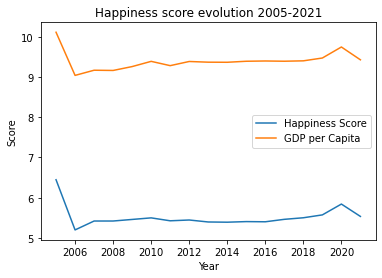

Money can not buy happiness... Really?


In [7]:
# Plot line for Happiness and GDP per Capita scores 2005-2021
plt.plot(avg_scores.index, avg_scores['Happiness Score'])
plt.plot(avg_scores.index, avg_scores['GDP per Capita'])
plt.legend(('Happiness Score','GDP per Capita'))
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Happiness score evolution 2005-2021')
plt.show()

print("Money can not buy happiness... Really?")

In [8]:
# Checking length of data for each year 
len_data_year = happiness_time_final.groupby(['Year']).count()

print("We have to take in consideration that not every year has the same amount of studied countries.")
print("This explains higher scores in 2005 (27 countries vs 149 in 2021). So, the year 2005 should not be considered as it is not representative enough.")

len_data_year

We have to take in consideration that not every year has the same amount of studied countries.
This explains higher scores in 2005 (27 countries vs 149 in 2021). So, the year 2005 should not be considered as it is not representative enough.


,Country,Region,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
Year,,,,,,,,,
2005,27,27,27,27,27,27,25,1,25
2006,89,89,89,88,89,88,86,81,83
2007,102,102,102,102,100,101,101,102,98
2008,110,110,110,110,110,108,107,109,107
2009,114,114,114,113,113,111,112,113,111
2010,124,124,124,123,120,121,122,123,119
2011,146,146,146,145,145,141,145,144,138
2012,142,142,142,140,142,136,141,133,132
2013,137,137,137,136,137,133,136,133,130


In [ ]:
s

In [9]:
happiness_map_time.dtypes

NameError: name 'happiness_map_time' is not defined

In [10]:
# Set variable holding happiness data in time, per country
happiness_map_time = happiness_time_final[['Year', 'Country', 'Happiness Score']]
happiness_map_time['Year'].astype(int)
happiness_map_time.sort_values(['Year'])

# Set happiness time map parameters
fig = px.choropleth(happiness_map_time, 
                     locations="Country", 
                     locationmode = "country names",
                     color = "Happiness Score",
                     hover_name = "Country",
                     color_continuous_scale = px.colors.sequential.Plasma,
                     animation_frame = "Year")

# Show map
fig.show()

TypeError: '<' not supported between instances of 'str' and 'int'

### Things to consider;
Correlation / Causation. What makes us Happy vs. What can result from Happiness..

In [ ]:
# Set values for x and y axis
x_axis = happiness_df['Happiness Score']
y_axis = happiness_df['GDP per Capita']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.7,8),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. GDP per Capita')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')          

# Save plotted figure as .png
plt.savefig("images/Happiness_GDP_per_capita.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

In [ ]:
# Set values for x and y axis
x_axis = happiness_df['Happiness Score']
y_axis = happiness_df['Social Support']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.7),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. Social support')
plt.xlabel('Happiness Score')
plt.ylabel('Social Support')

# Save plotted figure as .png
plt.savefig("images/Happiness_Social_Support.png")
           
# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

In [ ]:
# Set values for x and y axis
x_axis = happiness_df['Happiness Score']
y_axis = happiness_df['Life Expectancy']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.5,59),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. Life Expectancy')
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')          

# Save plotted figure as .png
plt.savefig("images/Happiness_Life_Expectancy.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

In [ ]:
# Set values for x and y axis
x_axis = happiness_df['Happiness Score']
y_axis = happiness_df['Freedom']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.7,0.61),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. Freedom')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')          

# Save plotted figure as .png
plt.savefig("images/Happiness_Freedom.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

In [ ]:
# Set values for x and y axis
x_axis = happiness_df['Happiness Score']
y_axis = happiness_df['Generosity']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2.5,0.22),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. Generosity')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')          

# Save plotted figure as .png
plt.savefig("images/Happiness_Generosity.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

In [ ]:
# Set values for x and y axis
x_axis = happiness_df['Happiness Score']
y_axis = happiness_df['Corruption']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2.5,0.22),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. Corruption')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')          

# Save plotted figure as .png
plt.savefig("images/Happiness_Corruption.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

In [ ]:
# Read in GDP per Capita .csv file
GDP_per_capita_df = pd.read_csv("Data/World_GDP_per_capita_1960-2019.csv")

# Reduce dataframe to only show 2019 GDP per Capita
GDP_per_capita_2019_df = GDP_per_capita_df[['Country Name', '2019']]

# Rename columns
GDP_per_capita_2019_df = GDP_per_capita_2019_df.rename(columns={'Country Name': 'Country',
                                                                '2019': '2019 GDP per Capita'})

# GDP_per_capita_df = GDP_per_capita_df.dropna()

# Show dataframe preview
GDP_per_capita_2019_df.head()

In [ ]:
# Read in GDP .csv file
GDP_df = pd.read_csv("Data/World_GDP_1960-2019.csv")

# Reduce dataframe to only show 2019 GDP per Capita
GDP_2019_df = GDP_df[['Country Name', '2019']]

# Rename columns
GDP_2019_df = GDP_2019_df.rename(columns={'Country Name': 'Country',
                                          '2019': '2019 GDP'})

# GDP_2019_df = GDP_2019_df.dropna()

# Show dataframe preview
GDP_2019_df.head()

In [ ]:
# Merge happiness, 2019 GDP per Capita and 2019 GDP dataframes
happiness_GDP_2019_df = pd.merge(happiness_df, GDP_per_capita_2019_df, how='inner', on="Country") 
happiness_GDP_2019_df = pd.merge(happiness_GDP_2019_df, GDP_2019_df, how='inner', on="Country") 

# Show dataframe preview
happiness_GDP_2019_df.head()

In [ ]:
# Set values for x and y axis
x_axis = happiness_GDP_2019_df['Happiness Score']
y_axis = happiness_GDP_2019_df['2019 GDP per Capita']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(3.5,20000),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. 2019 GDP per Capita')
plt.xlabel('Happiness Score')
plt.ylabel('2019 GDP per Capita')          

# Save plotted figure as .png
plt.savefig("images/Happiness_2019_GDP_per_Capita.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

In [ ]:
# Re-create previous plot but with a logarithmic scale on the y-axis
fig = plt.scatter(x_axis, y_axis)
ax = plt.gca()
ax.set_yscale('log')

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(3.5,20000),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. 2019 GDP per Capita')
plt.xlabel('Happiness Score')
plt.ylabel('2019 GDP per Capita')          

# Save plotted figure as .png
plt.savefig("images/Happiness_2019_GDP_per_Capita.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

In [ ]:
# Set values for x and y axis
x_axis = happiness_GDP_2019_df['Happiness Score']
y_axis = happiness_GDP_2019_df['2019 GDP']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(3,1000000000000),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. 2019 GDP')
plt.xlabel('Happiness Score')
plt.ylabel('2019 GDP')          

# Save plotted figure as .png
plt.savefig("images/Happiness_2019_GDP.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

In [ ]:
# Remove the outliers by setting a limit on the y-axis
axes = plt.gca()
axes.set_ylim([0,4500000000000])

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(3,1000000000000),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. 2019 GDP')
plt.xlabel('Happiness Score')
plt.ylabel('2019 GDP')          

# Save plotted figure as .png
plt.savefig("images/Happiness_2019_GDP.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()



In [ ]:
# Re-create previous plot but with a logarithmic scale on the y-axis
fig = plt.scatter(x_axis, y_axis)
ax = plt.gca()
ax.set_yscale('log')

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(3,0.5),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. 2019 GDP')
plt.xlabel('Happiness Score')
plt.ylabel('2019 GDP')          

# Save plotted figure as .png
plt.savefig("images/Happiness_2019_GDP.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

In [ ]:
# Sort dataframe by descending 2019 GDP to identify the two outliers
happiness_GDP_2019_sorted_df = happiness_GDP_2019_df.sort_values('2019 GDP', 
                                                                 ascending=False, 
                                                                 inplace=False)
# Show dataframe
print('The two extreme outliers in the Happiness vs. 2019 GDP scatter plot are the United States and China')
happiness_GDP_2019_sorted_df.head(10)

In [ ]:
# Load country_data.csv 
country_data = pd.read_csv("Data/country_data.csv").rename(columns={"Alpha-2 code":"Code"})

# Create a dataframe to store the COVID data
covid_data = pd.DataFrame(columns={"Covid Cases", "Covid Deaths", "Covid Death Rate", "Covid Cases per Mil Pop"})
covid_data.insert(0, "Country", country_data["Country"])

base_url = "http://corona-api.com/countries/"

# Use iterrows to iterate through the dataframe, adding each countires covid data
counter = 0
for index, row in country_data.iterrows():

    try:
        code = row["Code"]
    
        # call the COVID data API
        response = requests.get(base_url + code.lower()).json()
        
        # pull data from response
        covid_cases = response["data"]["latest_data"]["confirmed"]
        covid_deaths = response["data"]["latest_data"]["deaths"]
        covid_death_rate = response["data"]["latest_data"]["calculated"]["death_rate"]
        cases_per_mil_pop = response["data"]["latest_data"]["calculated"]["cases_per_million_population"]
    
        covid_data.iloc[index, 2] = float(covid_cases)
        covid_data.iloc[index, 4] = float(covid_deaths)
        covid_data.iloc[index, 1] = float(cases_per_mil_pop)
        
        if covid_death_rate != None:
            covid_data.iloc[index, 3] = float(covid_death_rate)
        else:
            covid_data.iloc[index, 3] = covid_death_rate

        counter += 1
        print(f"{round((counter/len(covid_data)*100),2)}% Done")
    
    except: 
        country = country_data.loc[index, "Country"]
        print(f"Error with country: {country}. No data found")
        
covid_data.to_csv("Data/covid_data.csv", index=False)
covid_data

In [ ]:
test_df = test_df["Covid Cases"].astype(float)#, "Covid Deaths", "Covid Death Rate", "Covid Cases per Mil Pop"]].astype(float)

test_df.info()

# Set values for x and y axis
# y_axis = test_df['Happiness Score']
# x_axis = test_df['Covid Cases']

# # Create line plot
# plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x_axis,regress_values,"r-")
# plt.annotate(line_eq,(2.5,0.22),fontsize=15,color="red")

# # Add title and labels to line plot
# plt.title('Happiness vs. Generosity')
# plt.xlabel('Happiness Score')
# plt.ylabel('Generosity')          

# # Save plotted figure as .png
# plt.savefig("images/Happiness_Generosity.png")

# # Show line plot
# print(f"The r-value is {rvalue}")
# plt.show()